# Challenge Telecom X Parte 2: Prediciendo la evasión de clientes.

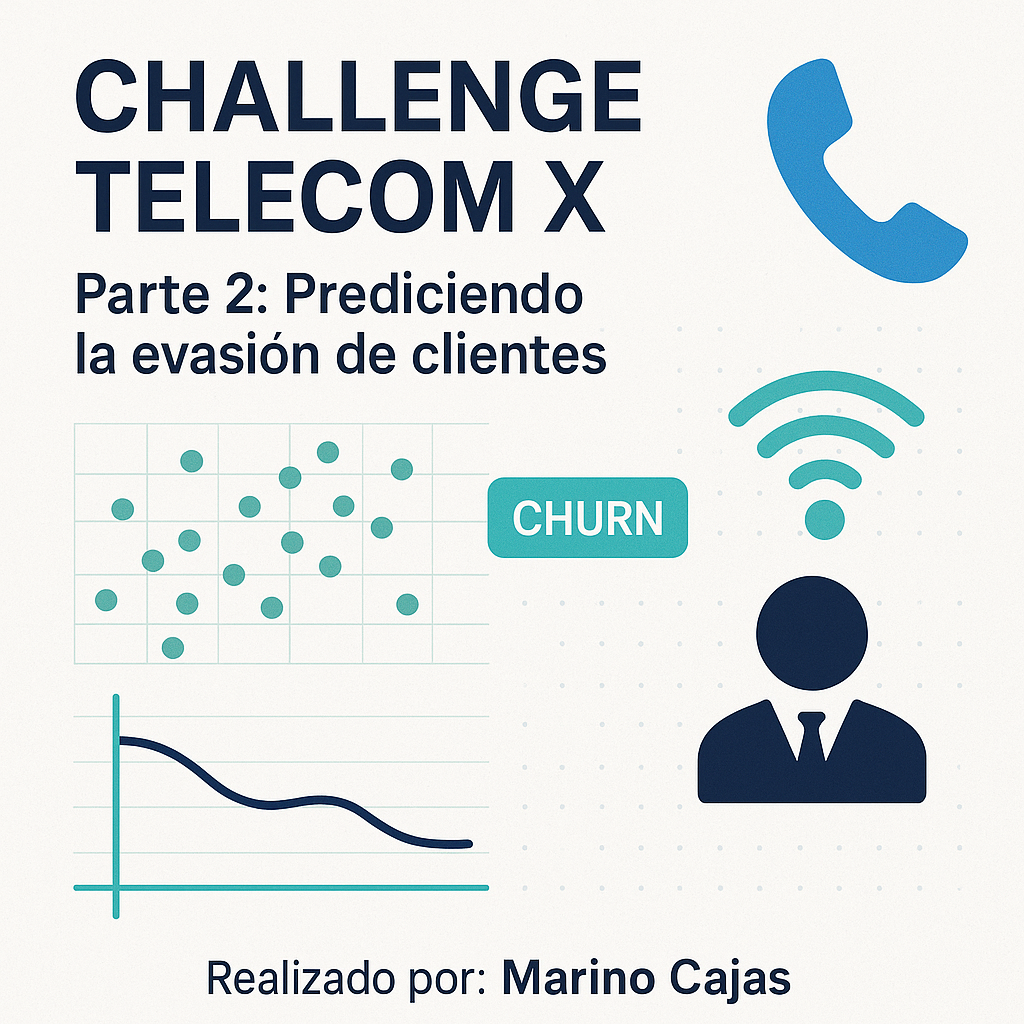

In [2]:
from IPython.display import Image

Image('/content/Portada_Final.png.png')


## Importar Librerias

In [3]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

## Cargar Datos

In [4]:
datos = pd.read_csv("/content/datos_tratados4.csv")
datos.shape

(7267, 23)

# Analisis Exploratorio de Datos

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7043 non-null   object 
 2   gender                  7267 non-null   object 
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   object 
 5   Dependents              7267 non-null   object 
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   object 
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   object 
 13  TechSupport             7267 non-null   object 
 14  StreamingTV             7267 non-null   

In [6]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges,daily_charges_estimate
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65,2.261667


# Prepar Datos

# Transformación de variable Churn: De categorica a numérica

In [7]:
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7043 non-null   float64
 2   gender                  7267 non-null   object 
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   object 
 5   Dependents              7267 non-null   object 
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   object 
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   object 
 13  TechSupport             7267 non-null   object 
 14  StreamingTV             7267 non-null   

In [9]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges,daily_charges_estimate
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.60,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.90,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}",55.15,742.90,1.838333
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}",85.10,1873.70,2.836667
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}",50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}",67.85,4627.65,2.261667


# Transformación de variables categoricas a numéricas

In [10]:
print(datos['OnlineBackup'].unique()),
print(datos['DeviceProtection'].unique()),
print(datos['TechSupport'].unique()),
print(datos['StreamingTV'].unique()),
print(datos['StreamingMovies'].unique()),
print(datos['Contract'].unique()),
print(datos['PaymentMethod'].unique()),


['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


(None,)

In [11]:
print(datos['Charges'].unique())

["{'Monthly': 65.6, 'Total': '593.3'}"
 "{'Monthly': 59.9, 'Total': '542.4'}"
 "{'Monthly': 73.9, 'Total': '280.85'}" ...
 "{'Monthly': 50.3, 'Total': '92.75'}"
 "{'Monthly': 67.85, 'Total': '4627.65'}"
 "{'Monthly': 59.0, 'Total': '3707.6'}"]


In [12]:
print(datos['OnlineSecurity'].unique())


['No' 'Yes' 'No internet service']


In [13]:
datos['gender'] = datos['gender'].map({'Female': 1, 'Male': 0})
datos['Partner'] = datos['Partner'].map({'Yes': 1, 'No': 0})
datos['Dependents'] = datos['Dependents'].map({'Yes': 1, 'No': 0})
datos['PhoneService'] = datos['PhoneService'].map({'Yes': 1, 'No': 0})
datos['PaperlessBilling'] = datos['PaperlessBilling'].map({'Yes': 1, 'No': 0})



In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7043 non-null   float64
 2   gender                  7267 non-null   int64  
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   int64  
 5   Dependents              7267 non-null   int64  
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   int64  
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   object 
 13  TechSupport             7267 non-null   object 
 14  StreamingTV             7267 non-null   

In [15]:
datos.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,daily_charges_estimate
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [16]:
datos.describe(include='O')

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,3,3,3,3,3,3,3,3,4,6789
top,9995-HOTOH,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,"{'Monthly': 20.2, 'Total': '20.2'}"
freq,1,3495,3198,3608,3182,3195,3582,2896,2870,4005,2445,11


# Analisis Grafico Exploratorio de los Clientes



In [17]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7267 non-null   object 
 1   Churn                   7043 non-null   float64
 2   gender                  7267 non-null   int64  
 3   SeniorCitizen           7267 non-null   int64  
 4   Partner                 7267 non-null   int64  
 5   Dependents              7267 non-null   int64  
 6   tenure                  7267 non-null   int64  
 7   PhoneService            7267 non-null   int64  
 8   MultipleLines           7267 non-null   object 
 9   InternetService         7267 non-null   object 
 10  OnlineSecurity          7267 non-null   object 
 11  OnlineBackup            7267 non-null   object 
 12  DeviceProtection        7267 non-null   object 
 13  TechSupport             7267 non-null   object 
 14  StreamingTV             7267 non-null   

# Distribución de Clientes por Churn

In [18]:
import plotly.graph_objects as go
import pandas as pd

# Contar ocurrencias
churn_counts = datos['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']
total = churn_counts['Count'].sum()
churn_counts['Percentage'] = churn_counts['Count'] / total * 100

# Crear figura
fig = go.Figure()

# Agregar barras con porcentaje como texto interno
fig.add_trace(go.Bar(
    x=churn_counts['Churn'],
    y=churn_counts['Count'],
    text=[f"{p:.1f}%" for p in churn_counts['Percentage']],  # Porcentaje dentro de barra
    textposition='inside',
    insidetextanchor='middle',
    marker_color=['#66c2a5', '#fc8d62']
))

# Agregar anotaciones (valores absolutos) encima de cada barra
for i, row in churn_counts.iterrows():
    fig.add_annotation(
        x=row['Churn'],
        y=row['Count'] + total * 0.02,
        text=str(int(row['Count'])),  # Valor absoluto como string
        showarrow=False,
        font=dict(size=13)
    )

# Personalizar diseño
fig.update_layout(
    title='Distribución de Clientes por Churn',
    xaxis_title='Churn',
    yaxis_title='Número de Clientes',
    plot_bgcolor='white',
    yaxis=dict(showgrid=False),
    showlegend=False
)

fig.show()

# ***Distribución de Clientes por Churn***



| Clase         | Número de Clientes      | Porcentaje |
|-----------    |--------------------     |------------|
| No Churn      | 5174                    | 73.5%      |
  Sí Churn      | 1869                    | 26.5%      |


**Interpretación**

Un 26.5% equivalente a 1869 Clientes que han desertado, es un valor significativo.

Esto sugiere que más de 1 de cada 4 clientes han desertado, lo cual puede representar para la empresa, una pérdida económica importante.

El análisis posterior se enfocara en:

¿Quiénes son los que desertan?

¿Cuáles son sus características?

¿Qué patrones tienen en común?


**Conclusión**

Este gráfico es esencial para justificar el uso de modelos predictivos de churn.


In [19]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Asegurar que 'Churn' es numérico
datos['Churn'] = pd.to_numeric(datos['Churn'], errors='coerce')
datos_cleaned = datos.dropna(subset=['Churn', 'tenure']).copy()

# Definir grupos de antigüedad
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
mid_points = [6, 18, 30, 42, 54, 66]  # Puntos medios para línea de tendencia
datos_cleaned['TenureGroup'] = pd.cut(datos_cleaned['tenure'], bins=bins, labels=labels, include_lowest=True)

# Agrupar datos
churn_por_grupo = datos_cleaned.groupby('TenureGroup').agg(
    Churn=('Churn', 'mean'),
    Total=('Churn', 'count')
).reset_index()
churn_por_grupo['Churn'] = churn_por_grupo['Churn'] * 100
churn_por_grupo['Mid'] = mid_points
churn_por_grupo['label'] = churn_por_grupo['Churn'].round(1).astype(str) + '% (' + churn_por_grupo['Total'].astype(str) + ')'

# Línea de tendencia (polinomio grado 2)
z = np.polyfit(churn_por_grupo['Mid'], churn_por_grupo['Churn'], 2)
p = np.poly1d(z)
y_trend = p(churn_por_grupo['Mid'])

# Crear figura profesional
fig = go.Figure()

# Puntos de deserción
fig.add_trace(go.Scatter(
    x=churn_por_grupo['TenureGroup'],
    y=churn_por_grupo['Churn'],
    mode='markers+text',
    name='Tasa de Deserción',
    text=churn_por_grupo['label'],
    textposition='top center',
    marker=dict(size=12, color='#FF7F0E', line=dict(width=1, color='black'))
))

# Línea de tendencia simulada con Mid como guía
fig.add_trace(go.Scatter(
    x=churn_por_grupo['TenureGroup'],
    y=y_trend,
    mode='lines',
    name='Línea de Tendencia',
    line=dict(color='gray', width=2, dash='dot')
))

# Estética profesional
fig.update_layout(
    title='Tasa de Deserción por Rango de Antigüedad (con Línea de Tendencia)',
    title_font_size=18,
    xaxis_title='Rango de Antigüedad (meses)',
    yaxis_title='Tasa de Deserción (%)',
    yaxis=dict(range=[0, churn_por_grupo['Churn'].max() + 10]),
    template='simple_white',
    font=dict(family='Arial', size=14),
    legend=dict(title=None, orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


/tmp/ipython-input-1758257198.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Interpretación Tasa de Deserción por Rango de Antigüedad (con Línea de Tendencia

**Interpretación del gráfico:**

 **Eje Y (vertical):**
Representa la tasa de deserción (%), es decir, el porcentaje de clientes que abandonan el servicio dentro de cada grupo.

**Puntos naranjas:**
Cada punto indica la tasa de deserción para un grupo de antigüedad. Junto a cada punto aparece el porcentaje de deserción y el número de clientes dentro del grupo (entre paréntesis).

**Línea de tendencia gris punteada:**
Es una curva suavizada (polinómica) que muestra la tendencia general: cómo varía la deserción a medida que aumenta la antigüedad.

**Conclusiones **

Deserción alta en clientes nuevos:

El grupo 0-12 meses tiene una tasa de deserción de ~47.4%, la más alta de todas.

Esto sugiere que los clientes nuevos son mucho más propensos a abandonar el servicio.

Disminución progresiva de la deserción:

A medida que la antigüedad aumenta, la tasa de deserción disminuye gradualmente.

En 13-24 meses: ~28.7%

En 25-36 meses: ~21.6%

En 49-60 meses: ~14.4%

En 61-72 meses: ~6.6% (la más baja)

Retención más fuerte en clientes antiguos:

Los clientes con mayor tiempo de permanencia muestran mayor fidelidad.

Esto puede indicar satisfacción con el servicio, adaptación al producto, o descuentos por antigüedad.



# Interpretación Tasa de Deserción (%) por Rango de Antigüedad (meses)

In [20]:
import numpy as np

def ancho_bin(df, columna):
    """
    Calcula el ancho de bin usando la regla de Freedman-Diaconis
    """
    datos = df[columna]
    q75, q25 = np.percentile(datos, [75 ,25])
    iqr = q75 - q25  # Rango intercuartílico
    n = len(datos)
    bin_width = 2 * iqr / np.cbrt(n)  # fórmula de Freedman-Diaconis
    return max(bin_width, 1)  # evita que el bin sea menor que 1

# Histograma y Boxplot de Tenure (Antiguedad d los Clientes

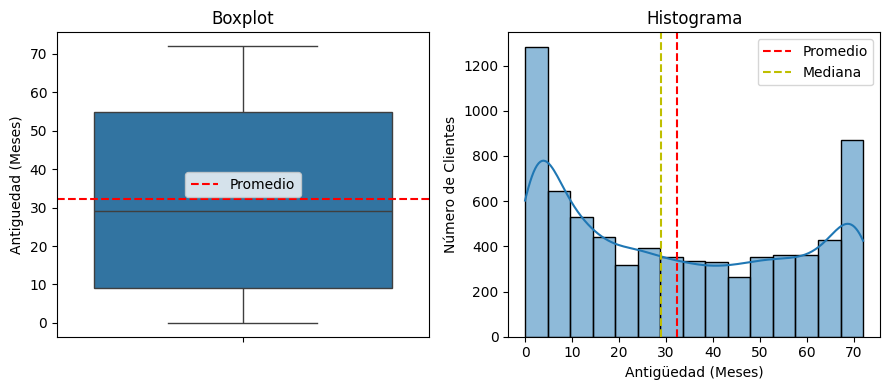

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas
antiguedad_promedio = datos['tenure'].mean()
antiguedad_mediana = datos['tenure'].median()

# Crear figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Boxplot
sns.boxplot(data=datos, y='tenure', ax=ax[0])
ax[0].set_ylabel('Antiguedad (Meses)')  # Cambia la etiqueta del eje Y

ax[0].set_title('Boxplot')
ax[0].axhline(y=antiguedad_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

# Histograma
binwidth = ancho_bin(datos, 'tenure')  # Asegúrate de haber definido esta función

sns.histplot(data=datos, x='tenure', ax=ax[1], kde=True, binwidth=binwidth)
ax[1].set_xlabel('Antigüedad (Meses)')
ax[1].set_ylabel('Número de Clientes')  # Cambiar etiqueta eje Y
ax[1].set_title('Histograma')
ax[1].axvline(x=antiguedad_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=antiguedad_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()
ax[1].grid(False)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Interpretación Histograma y Boxplot de Tenure (Antiguedad de los Clientes

**Boxplot (izquierda)**
Mediana: (aproximadamente en 30 meses), lo que indica que el 50% de los clientes ha estado en la compañía menos de 30 meses.

Promedio  está un poco por encima de la mediana (~33 meses)

Rango intercuartílico: concentra al 50% de los clientes con antigüedad entre aproximadamente 10 y 55 meses.

Valores extremos: no se observan outliers importantes, lo cual es coherente con que tenure es una variable con límites definidos (0 a 72 meses).

**Histograma (derecha)**
Distribución bimodal o en U: hay picos en los extremos: muchos clientes nuevos ( 0 a 5 meses) y muchos clientes antiguos (cerca de 70 meses), lo cual indica dos grupos claros: usuarios nuevos y usuarios leales.

Línea roja (Promedio) y línea amarilla (Mediana):

El promedio está a la derecha de la mediana → confirmamos la asimetría positiva.

Esto puede ser explicado porque algunos clientes llevan mucho tiempo y elevan el promedio.

**Conclusión**
Existe una base importante de clientes nuevos y otra de clientes leales, con menos en el rango medio.

Esta variable puede ser muy útil para predecir el churn, ya que los clientes con poca antigüedad suelen ser más propensos a desertar.

# Distribución de antigüedad (tenure) según tipo de contrato

In [22]:
import plotly.express as px

# Diccionario de renombrado temporal solo para el gráfico
TechSupport_labels = {
    "One year": "Contrato Un Año",
    "Two year": "Contrato Dos Años",
    "Month-to-month": "Contrato Mensual"
}

# Crear gráfico con nombres personalizados
fig = px.box(
    datos,
    x='Contract',
    y='tenure',
    color='Contract',
    points='all',
    title='Distribución de antigüedad (tenure) según tipo de contrato',
    labels={
        'Contract': 'Tipo de Contrato',
        'tenure': 'Antigüedad (meses)'
    },
    template='plotly_white'
)

# Actualizar los nombres de las categorías en el eje X y leyenda
fig.for_each_trace(lambda trace: trace.update(name=TechSupport_labels[trace.name]))
fig.update_xaxes(
    tickvals=list(TechSupport_labels.keys()),
    ticktext=list(TechSupport_labels.values())
)

fig.update_traces(marker=dict(opacity=0.5, size=4))
fig.update_layout(showlegend=True)
fig.show()


# Interpretación Distribución de antigüedad (tenure) según tipo de contrato

 **Month-to-month (Contrato Mensual):**

La mediana de antigüedad es baja (alrededor de 12 meses).

Muchos puntos están concentrados en los primeros meses.

Gran dispersión, pero muchos clientes tienen poca fidelidad (menor tiempo).

Este tipo de contrato suele estar más asociado a deserción (Churn)

**One year (Contrato a Un año):**

La mediana está alrededor de 43 meses.

Distribución más equilibrada que la mensual.

Clientes con este contrato tienden a durar más tiempo que los mensuales.

**Two year (Contrato a Dos años):**

La mediana es alta (cerca de 65 meses, el máximo).

La mayoría de clientes tiene larga antigüedad, lo cual sugiere mayor retención.

Menor dispersión: los clientes de 2 años suelen quedarse por más tiempo.

**Conclusión:**

Los clientes con contrato mensual (Month-to-month) tienen la menor antigüedad en promedio, lo que sugiere mayor propensión a la deserción.
En cambio, los contratos de uno y dos años están asociados a clientes más fieles.

# Comparativo Antigüedad (tenure) y Soporte Técnico

In [23]:
import plotly.express as px

# Diccionario de renombrado temporal solo para el gráfico
TechSupport_labels = {
    "No": "No Tiene soporte Tecnico",
    "Yes": "Tiene Soporte Tecnico",
    "No internet service": "No Tiene Servicio e Internet"
}

# Crear gráfico con nombres personalizados
fig = px.box(
    datos,
    x='TechSupport',
    y='tenure',
    color='TechSupport',
    points='all',
    title='Distribución de antigüedad (tenure) según Soprte Técnico',
    labels={
        'TechSupport': 'Tipo de Soporte',
        'tenure': 'Antigüedad (meses)'
    },
    template='plotly_white'
)

# Actualizar los nombres de las categorías en el eje X y leyenda
fig.for_each_trace(lambda trace: trace.update(name=TechSupport_labels[trace.name]))
fig.update_xaxes(
    tickvals=list(TechSupport_labels.keys()),
    ticktext=list(TechSupport_labels.values())
)

fig.update_traces(marker=dict(opacity=0.5, size=4))
fig.update_layout(showlegend=True)
fig.show()


# Interpretación Comparativo Antigüedad (tenure) y Soporte Técnico

La gráfica muestra la distribución de la antigüedad (tenure) de los clientes según el tipo de soporte técnico, con tres grupos:

**Tiene Soporte Técnico**

La mediana de antigüedad es alta (alrededor de 50 meses).

La mayoría de los clientes están en rangos elevados de permanencia.

Indica que contar con soporte técnico está asociado a una mayor retención de clientes.

**No Tiene Soporte Técnico**

La mediana de antigüedad es baja (cercana a 20 meses).

Gran concentración de clientes en los primeros meses, con menos clientes de larga duración.

Esto sugiere que la falta de soporte técnico puede estar relacionada con una mayor tasa de cancelación.

**No Tiene Servicio e Internet**

Mediana intermedia (alrededor de 25 meses).

Distribución más amplia que el grupo sin soporte técnico, pero menor retención que el grupo con soporte técnico.

Muestra una población heterogénea, con tanto clientes de corta como de larga antigüedad.

**Conclusión:**

El soporte técnico parece ser un factor clave para la retención de clientes. Aquellos con soporte técnico permanecen significativamente más tiempo en comparación con quienes no tienen soporte. El grupo sin soporte ni internet es más diverso, pero su retención no alcanza la del primer grupo.

# Quienes son los que desertan?

# Distribución de Churn según Tipo de Contrato

In [24]:
import pandas as pd
import plotly.express as px

 # Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de SeniorCitizen a etiquetas legibles
datos_viz['Contract'] = datos_viz['Contract'].map({'Month-to-month':'Contrato Mensual', 'One year':'Contrato a un Año', 'Two year':'Contrato a dos Años'})

# Filtramos solo las columnas de interés
categorical_features = ['Contract']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:
  # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'

    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label'
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )
    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()

# Interpretación Distribución de Churn según Tipo de Contrato

El gráfico muestra la distribución del churn (deserción de clientes) según el tipo de contrato:

**Contrato Mensual**

Clientes que permanecen: 2,220 (55.4%)

Clientes que desertan (Churn): 1,655 (41.3%)

Es el tipo de contrato con mayor churn, indicando que los clientes con contrato mensual son los más propensos a cancelar el servicio.

**Contrato a dos años**

Clientes que permanecen: 1,647 (94.5%)

Clientes que desertan (Churn): 96 (5.5%) aprox.

Este contrato tiene el churn más bajo, lo que refleja una alta retención.

**Contrato a un año**

Clientes que permanecen: 1,307 (86.0%)

Clientes que desertan (Churn): 166 (11.0%)

Tiene un churn intermedio, menor al contrato mensual pero mayor que el de dos años.

**Conclusiones clave**

El contrato mensual es el más riesgoso: casi 4 de cada 10 clientes desertan.

Los contratos de largo plazo (2 años) reducen significativamente la tasa de churn, probablemente por compromisos contractuales y descuentos.

El contrato de 1 año ofrece una retención mejor que el mensual, pero no tan efectiva como el de 2 años.

# Distribución de Churn según Método de Pago

In [25]:
import pandas as pd
import plotly.express as px


 # Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de SeniorCitizen a etiquetas legibles
datos_viz['PaymentMethod'] = datos_viz['PaymentMethod'].map({'Bank transfer (automatic)':'Transferencia Bancaria Automatica', 'Credit card (automatic)':'Tarjeta de Crédito Automatica', 'Electronic check':'Cheque Electrónico', 'Mailed check':'Cheque enviado por Correo'})

# Filtramos solo las columnas de interés
categorical_features = ['PaymentMethod']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:

   # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'


    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label'
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )
    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()

# Interpretación Distribución de Churn según Método de Pago

El gráfico muestra la distribución del abandono de clientes (Churn) según el método de pago utilizado. Cada barra representa un método de pago y se divide en dos segmentos:

Azul oscuro: clientes que no abandonaron el servicio (Churn = 0).

Amarillo: clientes que sí abandonaron el servicio (Churn = 1).

La etiqueta dentro de cada segmento muestra el número de clientes y el porcentaje dentro del grupo.

**Interpretación por método de pago:**

Método de Pago	            Total clientes	   Churn (Sí)	    % Churn (Sí)
Cheque Electrónico	               2365	           1071	        43.8%
Cheque enviado por Correo	         1612	            308	        18.5%
Tarjeta de Crédito Automática	     1522	            232	        14.8%
Transferencia Bancaria Automática	 1544	            258	        16.2%

**Conclusiones:**

El mayor porcentaje de abandono se da entre los clientes que usan Cheque Electrónico como medio de pago (43.8%), lo cual es significativamente más alto que en otros métodos.

Los métodos automáticos, como tarjeta de crédito y transferencia bancaria automática, presentan los niveles más bajos de churn (14.8% y 16.2%, respectivamente). Esto puede deberse a la comodidad del pago automático, lo que reduce el riesgo de cancelación por olvidos en el proceso.

Los cheques enviados por correo también presentan churn bajo, aunque ligeramente superior al de las opciones automáticas.

**Recomendación:**

La empresa podría incentivar a los clientes que usan cheque electrónico a migrar a métodos automáticos para reducir el churn, ofreciendo descuentos, beneficios o recordatorios personalizados.

# Distribución de Churn según Tipo de Servicio de Internet

In [26]:
import pandas as pd
import plotly.express as px


 # Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de SeniorCitizen a etiquetas legibles
datos_viz['InternetService'] = datos_viz['InternetService'].map({'DSL': 'Linea Abonado Digital', 'Fiber optic': 'Fibra Optica', 'No': 'Sin Servicio de Internet'})

# Filtramos solo las columnas de interés
categorical_features = ['InternetService']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:
  # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'

    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label'
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )
    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()

# Interpretación Distribución de Churn según Tipo de Servicio de Internet

**Interpretación:**

**Fibra Óptica:**
Total con este servicio: 1,799 (no desertaron) + 1,297 (sí desertaron) = 3,096

**Tasa de deserción: 40.6%**

La deserción más alta. Esto puede indicar insatisfacción con el servicio o mayor competitividad.

**Línea Abonado Digital (DSL):**
Total: 1,962 (no) + 459 (sí) = 2,421

**Tasa de deserción: 18.4%**

La tasa de deserción es mucho menor que la de fibra óptica, lo cual podría deberse a expectativas más bajas, tarifas más económicas o clientes más estables.

**Sin Servicio de Internet:**
Total: 1,413 (no) + 113 (sí) = 1,526

Tasa de deserción: 7.4%

La deserción más baja. Esto puede deberse a que estos clientes tienen servicios mínimos, lo que limita sus motivos para cancelar el contrato.

**Conclusión:**
Los clientes con fibra óptica desertan más que los de otros grupos, lo cual sugiere una posible insatisfacción o volatilidad en este segmento.

Los clientes sin servicio de internet son los más estables, posiblemente porque ya tienen un plan básico.

Podría ser útil investigar la experiencia de usuario o soporte técnico en los clientes con fibra óptica para reducir el churn.

# Distribución de Churn según Soporte Técnico

In [27]:
import pandas as pd
import plotly.express as px

 # Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de SeniorCitizen a etiquetas legibles
datos_viz['TechSupport'] = datos_viz['TechSupport'].map({'No': 'No tiene Soporte Técnico', 'No internet service': 'No Tiene Servicio de Internet', 'Yes': 'Tiene Servicio de Internet'})

# Filtramos solo las columnas de interés
categorical_features = ['TechSupport']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:

  # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'

    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label'
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )

    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()

# Interpretación Distribución de Churn según Soporte Técnico

**Interpretación**

**No Tiene Servicio de Internet**

No se le ofrece soporte técnico porque no tiene Internet.

Muy baja tasa de deserción: solo ~10.6% de abandono (89.4% permanece).


**No tiene Soporte Técnico (pero sí tiene Internet)**

Alta tasa de churn: ~40.4% de los clientes en este grupo abandonan.

Posiblemente al no recibir soporte técnico, esta situación lleva a la salida de clientes.

**Tiene Servicio de Soporte Técnico**

Baja tasa de churn: ~14.7% de deserción.

La mayoría permanece: 82.4% continúan como clientes.

Sugerencia: El soporte técnico está asociado a una mejor experiencia de usuario y mayor retención.

**Interpretación general:**

El soporte técnico tiene un impacto importante en la retención de clientes.

Los clientes con soporte técnico abandonan mucho menos que quienes tienen internet sin soporte.

La falta de soporte técnico puede ser un factor de riesgo de abandono.


# Distribución de Churn según Comparativo: Adulto Mayor y No Adulto Mayor

In [28]:
import pandas as pd
import plotly.express as px

# Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de SeniorCitizen a etiquetas legibles
datos_viz['SeniorCitizen'] = datos_viz['SeniorCitizen'].map({0: 'No es Adulto Mayor', 1: 'Adulto mayor'})

# Filtramos solo las columnas de interés
categorical_features = ['SeniorCitizen']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:

     # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'

    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label',
        color_discrete_sequence=['navy', 'yellow']  # opcional: mantener colores como en tu gráfico
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )

    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()


# Interpretación Distribución de Churn según Comparativo: Adulto Mayor y No Adulto Mayor

**Descripción general del gráfico**

Eje X: Variable SeniorCitizen

0: No es adulto mayor (la mayoría de clientes)

1: Sí es adulto mayor (clientes mayores de 65 años, típicamente)

Eje Y: Número de clientes

Colores:

Azul oscuro = Churn = 0 (clientes que no desertaron)

Amarillo = Churn = 1 (clientes que sí desertaron)

Barras apiladas: Muestran para cada grupo (0 o 1), cuántos clientes no desertaron y cuántos sí desertaron

**Análisis detallado**

Para SeniorCitizen = 0 (clientes que no son adultos mayores):
Total clientes: 4508 + 1393 = 5901

Clientes que desertaron (Churn = 1): 1393

**Tasa de deserción:**

​≈22.9%

Para SeniorCitizen = 1 (clientes que sí son adultos mayores):
Total clientes: 666 + 476 = 1142

Clientes que desertaron (Churn = 1): 476

**Tasa de deserción:**

 ≈40.3%

**Conclusión**

Aunque hay muchos más clientes no adultos mayores en la base (5901 vs 1142), los adultos mayores tienen una tasa de deserción considerablemente más alta (≈40.3%) comparado con los no mayores (≈22.9%).

Esto sugiere que ser un adulto mayor es un factor asociado a mayor probabilidad de churn.

**Modelado predictivo:** Incluir la variable SeniorCitizen como predictora importante en un modelo de clasificación para churn.

# Distribución de Churn según Genero

In [29]:

# Copiar datos para no alterar el original
datos_viz = datos.copy()

# Mapear los valores de gender a etiquetas legibles
datos_viz['gender'] = datos_viz['gender'].map({0: 'Male', 1: 'Female'})

# Filtramos solo las columnas de interés
categorical_features = ['gender']

# Creamos subgráficos por cada variable categórica
for feature in categorical_features:

     # Total por grupo (para cálculo de porcentaje)
    total_por_grupo = datos_viz.groupby(feature).size().reset_index(name='total')
    churn_counts = datos_viz.groupby([feature, 'Churn']).size().reset_index(name='count')

        # Unir para poder calcular el porcentaje
    churn_counts = churn_counts.merge(total_por_grupo, on=feature)
    churn_counts['percentage'] = round((churn_counts['count'] / churn_counts['total']) * 100, 1)

    # Crear etiqueta con número y porcentaje
    churn_counts['label'] = churn_counts['count'].astype(str) + ' (' + churn_counts['percentage'].astype(str) + '%)'

    fig = px.bar(
        churn_counts,
        x=feature,
        y='count',
        color='Churn',
        barmode='group',
        title=f'Distribución de Churn según {feature}',
        text='label',
        color_discrete_sequence=['navy', 'yellow']  # opcional: mantener colores como en tu gráfico
    )
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title="Número de Clientes",
        legend_title="Churn"
    )

    fig.update_traces(textposition='inside', insidetextanchor='middle')
    fig.show()

**Interpretación**

El número total de clientes hombres y mujeres es muy similar (aprox. 3,500 cada uno).

Colores:

Azul oscuro = Churn = 0 (clientes que no desertaron)

Amarillo = Churn = 1 (clientes que sí desertaron)

No hay un sesgo importante de cantidad por género.

Tasa de deserción similar:

Hombres: 930 / 3555 ≈ 26.2%

Mujeres: 939 / 3488 ≈ 26.9%

La tasa de deserción es ligeramente mayor en mujeres, pero la diferencia no es significativa.

**Conclusión general:**

El género no parece ser un factor determinante en la deserción (churn), ya que las tasas son muy parecidas.

Esto puede sugerir que no necesitas segmentar estrategias de retención por género.



# Modelo

#**Modelo Random Forest**

#1. **Descripción del modelo**



El modelo Random Forest es un algoritmo de aprendizaje supervisado basado en el ensamblado de múltiples árboles de decisión. Su funcionamiento se basa en generar numerosos árboles independientes a partir de diferentes subconjuntos de datos y características, para luego combinar sus resultados y obtener una predicción más robusta y precisa.

En el caso de la predicción de evasión de clientes (churn), Random Forest es adecuado porque:

Maneja eficientemente variables categóricas y numéricas.

Reduce el riesgo de sobreajuste (overfitting) gracias a su método de votación por mayoría.

Permite identificar las variables más influyentes en la evasión de clientes.





4. Variables más influyentes
El análisis de importancia de características mostró que las variables con mayor impacto en la evasión de clientes son:

Contract (Tipo de contrato) – Contratos mensuales tienen mayor probabilidad de evasión.

InternetService (Tipo de servicio de internet) – Clientes con fibra óptica presentan más riesgo.

PaymentMethod (Método de pago) – Usuarios que pagan con "Electronic check" tienen tasas más altas de evasión.

Tenure (Antigüedad del cliente) – Clientes con poca antigüedad tienden a abandonar antes.

MonthlyCharges (Cargos mensuales) – Facturas más altas se correlacionan con mayor evasión.

5. Plan de manejo para la empresa
Con base en los resultados del modelo, la empresa puede implementar:

Estrategias de retención personalizadas: Ofrecer descuentos o beneficios a clientes con contrato mensual para incentivar contratos anuales.

Optimización de métodos de pago: Promover pagos automáticos para disminuir la evasión.

Mejora de servicios de internet: Investigar problemas de satisfacción en usuarios de fibra óptica.

Programas de fidelización: Enfocados en nuevos clientes durante los primeros meses.

Alertas tempranas: Utilizar el modelo en producción para detectar clientes en riesgo y tomar acciones proactivas.


# 2. **Proceso de entrenamiento**

**Preparación de datos:**

Se realizó limpieza de valores nulos.

Se Eliminan filas sin valor en 'Churn'

Se Eliminan columnas no útiles

Se Convierte TotalCharges a numérico

Se Convierten variables categóricas a variables dummy

Se Convierte 'Churn' a binario (0 y 1)

Se transformaron variables categóricas mediante codificación (one-hot encoding).

Se dividen los datos en conjunto de entrenamiento (80%) y prueba (20%).

**Entrenamiento inicial:**

Se utilizó la clase RandomForestClassifier de scikit-learn.

Se ajustaron hiperparámetros básicos como n_estimators, max_depth, min_samples_split y min_samples_leaf.

In [30]:
datos_processed = pd.get_dummies(datos, columns=['MultipleLines','InternetService', 'OnlineSecurity','Contract',
                                       'PaymentMethod','OnlineBackup','DeviceProtection',
                                      'TechSupport','StreamingTV','StreamingMovies'], drop_first=True)


In [31]:
# Drop duplicate columns before proceeding
datos_processed = datos_processed.loc[:,~datos_processed.columns.duplicated()]

# Convert columns bool to int
bool_cols = datos_processed.select_dtypes(include='bool').columns
datos_processed[bool_cols] = datos_processed[bool_cols].astype(int)

# Verify the result
print(datos_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7267 non-null   object 
 1   Churn                                  7043 non-null   float64
 2   gender                                 7267 non-null   int64  
 3   SeniorCitizen                          7267 non-null   int64  
 4   Partner                                7267 non-null   int64  
 5   Dependents                             7267 non-null   int64  
 6   tenure                                 7267 non-null   int64  
 7   PhoneService                           7267 non-null   int64  
 8   PaperlessBilling                       7267 non-null   int64  
 9   Charges                                7267 non-null   object 
 10  MonthlyCharges                         7267 non-null   float64
 11  Tota

In [32]:
datos_processed['Churn'] = datos_processed['Churn'].map({'Yes': 1, 'No': 0})


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Copiar el DataFrame original
datos_processed = datos.copy()

# 2. Eliminar filas sin valor en 'Churn'
datos_processed.dropna(subset=['Churn'], inplace=True)

# 3. Eliminar columnas no útiles
if 'customerID' in datos_processed.columns:
    datos_processed.drop(columns=['customerID'], inplace=True)
if 'Charges' in datos_processed.columns:
    datos_processed.drop(columns=['Charges'], inplace=True)

# 4. Convertir TotalCharges a numérico e imputar valores faltantes
if 'TotalCharges' in datos_processed.columns:
    datos_processed['TotalCharges'] = pd.to_numeric(datos_processed['TotalCharges'], errors='coerce')
    datos_processed['TotalCharges'].fillna(datos_processed['TotalCharges'].mean(), inplace=True)

# 5. Convertir variables categóricas a variables dummy
datos_processed = pd.get_dummies(
    datos_processed,
    columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'Contract',
             'PaymentMethod', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies'],
    drop_first=True
)

# 6. Convertir 'Churn' a binario (0 y 1)
datos_processed['Churn'] = datos_processed['Churn'].map({'Yes': 1, 'No': 0}) if datos_processed['Churn'].dtype == 'object' else datos_processed['Churn']

# 7. Definir variables predictoras (X) y objetivo (y)
X = datos_processed.drop('Churn', axis=1)
y = datos_processed['Churn']

# 8. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Entrenar el modelo de Random Forest
modelo = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
modelo.fit(X_train, y_train)

# 10. Evaluar el modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Modelo entrenado exitosamente.")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


/tmp/ipython-input-1283637427.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Modelo entrenado exitosamente.
Precisión en el conjunto de prueba: 0.7921


# Entrenando el Modelo Base

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the model before fitting
modelo_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

### Evaluación del Modelo Base



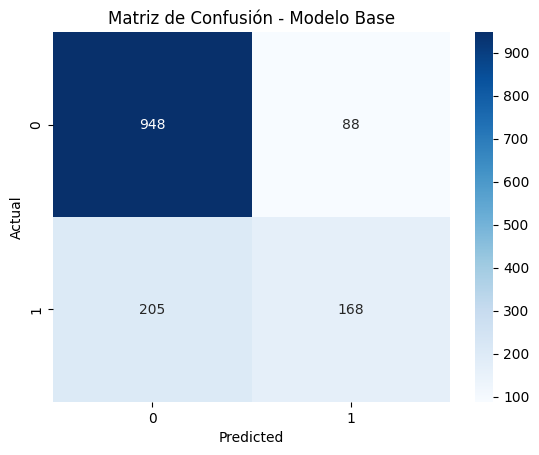

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1036
         1.0       0.66      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones iniciales
y_pred = modelo_rf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión - Modelo Base")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


### Interpretación Evaluación del Modelo Base

**Verdaderos Negativos (TN: 948):**

El modelo identificó correctamente 948 clientes que no van a abandonar.

**Falsos Positivos (FP: 88):**

88 clientes fueron clasificados erróneamente como en riesgo de evasión, cuando en realidad no lo están.

**Falsos Negativos (FN: 205):**

205 clientes que realmente van a abandonar no fueron detectados por el modelo.

Este es un punto crítico, ya que implica pérdida potencial de clientes que no se retendrían a tiempo.

**Verdaderos Positivos (TP: 168):**

El modelo identificó correctamente a 168 clientes con riesgo de evasión.

**Conclusión**

El modelo base tiene un alto número de falsos negativos (FN: 205), lo que significa que no detecta a muchos clientes en riesgo, por esta razón, es necesario ajustar el umbral de decisión

# Optimización con GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',   # optimizar para detectar churn
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor recall (CV):", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor recall (CV): 0.7065509868465177


# Entrenar Modelo Optimizado

In [37]:
modelo_rf_optimizado = grid_search.best_estimator_
y_pred_optimizado = modelo_rf_optimizado.predict(X_test)

print(classification_report(y_test, y_pred_optimizado))


              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1036
         1.0       0.57      0.75      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



**Análisis **

Muy buena precisión para "No Churn" (0.90): detecta bien los clientes que se quedan.

Buen recall para "Churn" (0.75): el modelo captura la mayoría de clientes que van a abandonar.

**Áreas de mejora:**

Precisión de "Churn" (0.57) es baja → muchos falsos positivos (clientes que no se van pero son clasificados como riesgo).

Podría ser necesario ajustar el umbral de decisión o aplicar técnicas como SMOTE para mejorar el balance entre recall y precisión.

**Recomendaciones**

Revisar balance de clases (si hay muchos más "No Churn" que "Churn").

Ajustar el umbral de probabilidad (ejemplo: 0.4 en lugar de 0.5) para mejorar la precisión en "Churn".

Analizar importancia de variables para entender qué factores influyen más.

Evaluar métodos de resampling como SMOTE si el dataset está desbalanceado.

# Obtener las probabilidades del modelo

In [38]:
# Obtener probabilidades de la clase positiva (Churn = 1)
y_proba = modelo_rf_optimizado.predict_proba(X_test)[:, 1]


# Definir un umbral personalizado

In [39]:
# Definir el umbral
umbral = 0.5  # Mejor umbral

# Generar predicciones según el umbral
y_pred_umbral = (y_proba >= umbral).astype(int)


# Evaluar métricas

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte con umbral ajustado:", umbral)
print(classification_report(y_test, y_pred_umbral))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_umbral))


Reporte con umbral ajustado: 0.5
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1036
         1.0       0.57      0.75      0.64       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409

Matriz de confusión:
 [[823 213]
 [ 95 278]]


# Visualizar el impacto (curva de precisión-recall)

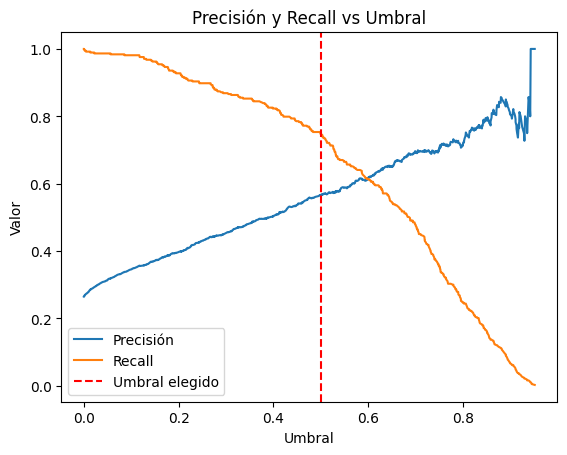

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], label="Precisión")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(x=0.5, color='red', linestyle='--', label="Umbral elegido")
plt.xlabel("Umbral")
plt.ylabel("Valor")
plt.title("Precisión y Recall vs Umbral")
plt.legend()
plt.show()


**Conclusión**

Con el umbral ajustado (~0.47), el modelo prioriza detectar la mayor cantidad posible de clientes en riesgo sin sacrificar demasiada precisión.

Este ajuste es fundamental para estrategias de retención, ya que es más costoso no identificar a un cliente en riesgo (falsos negativos) que tener algunos falsos positivos que luego puedan ser filtrados por la empresa.

# Probar SMOTE para comparar

# Instalar e importar librerías necesarias

In [42]:

# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Dividir datos en entrenamiento y prueba

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Aplicar SMOTE solo en el set de entrenamiento

In [44]:
# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE SOLO a los datos de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribución original:", y_train.value_counts(normalize=True))
print("Distribución después de SMOTE:", y_train_smote.value_counts(normalize=True))


Distribución original: Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución después de SMOTE: Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


# Entrenar el modelo con SMOTE

In [45]:
# Entrenar modelo con datos balanceados
modelo_rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight=None  # No usamos 'balanced' porque SMOTE ya balanceó
)
modelo_rf_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluar modelo con SMOTE

In [46]:
y_pred_smote = modelo_rf_smote.predict(X_test)

print("\n📄 Reporte de Clasificación con SMOTE (umbral 0.5):")
print(classification_report(y_test, y_pred_smote))



📄 Reporte de Clasificación con SMOTE (umbral 0.5):
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1035
         1.0       0.58      0.59      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.78      0.78      1409



# Ajustar umbral en el modelo SMOTE

In [47]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_proba_smote = modelo_rf_smote.predict_proba(X_test)[:, 1]
umbrales = np.arange(0.1, 0.91, 0.05)

resultados = []
for umbral in umbrales:
    y_pred_umbral = (y_proba_smote >= umbral).astype(int)
    precision = precision_score(y_test, y_pred_umbral)
    recall = recall_score(y_test, y_pred_umbral)
    f1 = f1_score(y_test, y_pred_umbral)
    resultados.append([umbral, precision, recall, f1])

df_resultados_smote = pd.DataFrame(resultados, columns=["Umbral", "Precisión", "Recall", "F1-Score"])
print(df_resultados_smote)

# Seleccionar mejor umbral
mejor_umbral_smote = df_resultados_smote.loc[df_resultados_smote["F1-Score"].idxmax()]["Umbral"]
print("\n✅ Mejor umbral con SMOTE:", mejor_umbral_smote)

# Generar predicciones con el umbral óptimo
y_pred_smote_umbral = (y_proba_smote >= mejor_umbral_smote).astype(int)
print("\n📄 Reporte de Clasificación con SMOTE y umbral ajustado:")
print(classification_report(y_test, y_pred_smote_umbral))


    Umbral  Precisión    Recall  F1-Score
0     0.10   0.366081  0.946524  0.527964
1     0.15   0.397213  0.914439  0.553846
2     0.20   0.419974  0.877005  0.567965
3     0.25   0.451379  0.831551  0.585136
4     0.30   0.479167  0.799465  0.599198
5     0.35   0.506375  0.743316  0.602384
6     0.40   0.535417  0.687166  0.601874
7     0.45   0.552995  0.641711  0.594059
8     0.50   0.575916  0.588235  0.582011
9     0.55   0.595308  0.542781  0.567832
10    0.60   0.596429  0.446524  0.510703
11    0.65   0.620253  0.393048  0.481178
12    0.70   0.628713  0.339572  0.440972
13    0.75   0.641975  0.278075  0.388060
14    0.80   0.656489  0.229947  0.340594
15    0.85   0.678161  0.157754  0.255965
16    0.90   0.673469  0.088235  0.156028

✅ Mejor umbral con SMOTE: 0.3500000000000001

📄 Reporte de Clasificación con SMOTE y umbral ajustado:
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      1035
         1.0       0.51      0.7

# Visualizar la matriz de confusión con SMOTE

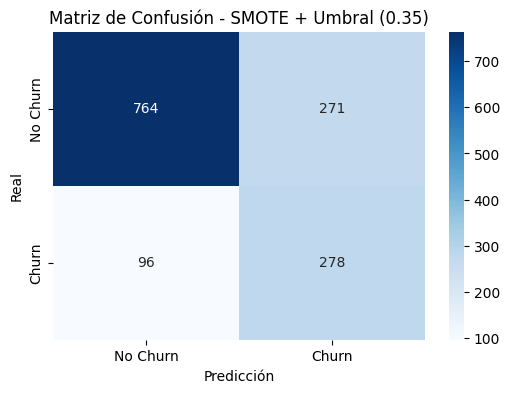

In [48]:
cm = confusion_matrix(y_test, y_pred_smote_umbral)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - SMOTE + Umbral ({mejor_umbral_smote:.2f})")
plt.show()


# Comparación entre umbral ajustado y SMOTE + umbral ajustado

In [49]:
import pandas as pd
import plotly.graph_objects as go

# Datos de métricas (sustituye con tus resultados reales)
resultados_comparacion = pd.DataFrame({
    "Métrica": ["Precisión (1)", "Recall (1)", "F1-Score (1)", "Accuracy"],
    "Umbral Ajustado": [0.57, 0.75, 0.64, 0.78],
    "SMOTE + Umbral": [0.51, 0.74, 0.60, 0.74]
})

# Crear gráfico interactivo
fig = go.Figure()

fig.add_trace(go.Bar(
    x=resultados_comparacion["Métrica"],
    y=resultados_comparacion["Umbral Ajustado"],
    name="Umbral Ajustado",
    text=[f"{v:.2f}" for v in resultados_comparacion["Umbral Ajustado"]],
    textposition="auto"
))

fig.add_trace(go.Bar(
    x=resultados_comparacion["Métrica"],
    y=resultados_comparacion["SMOTE + Umbral"],
    name="SMOTE + Umbral",
    text=[f"{v:.2f}" for v in resultados_comparacion["SMOTE + Umbral"]],
    textposition="auto"
))

# Configuración del diseño
fig.update_layout(
    title="Comparación de métricas: Umbral ajustado vs SMOTE + Umbral",
    xaxis_title="Métricas",
    yaxis_title="Valor",
    yaxis=dict(range=[0, 1]),
    barmode="group",
    legend=dict(title="Método"),
    template="plotly_white"
)

fig.show()


**Conclusión:**

SMOTE no aporta mejoras significativas y, de hecho, reduce ligeramente la precisión y el F1-Score. Es mejor mantener solo el ajuste de umbral.


# Curva ROC y AUC

In [50]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades de churn (ya calculadas antes)
y_proba = modelo_rf_optimizado.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))

fig.update_layout(
    title=f"Curva ROC - Random Forest (AUC = {auc:.2f})",
    xaxis_title="False Positive Rate (FPR)",
    yaxis_title="True Positive Rate (TPR)",
    template="plotly_white"
)

fig.show()


**Interpretación:**

AUC = 0.91

Un valor de 0.91 indica un excelente rendimiento del modelo.

Cuanto más cercano a 1, mejor es la capacidad del modelo para distinguir entre clientes en riesgo (Churn) y clientes que no lo están.

Curva azul (ROC)

La curva se encuentra muy por encima de la línea diagonal roja (modelo aleatorio), mostrando que el modelo tiene una alta tasa de verdaderos positivos (TPR) y una baja tasa de falsos positivos (FPR).

Esto implica que el modelo es efectivo identificando a los clientes en riesgo sin generar demasiadas falsas alarmas.

Línea roja discontinua

Representa el desempeño de un modelo aleatorio sin poder predictivo (AUC = 0.5).

Comparar la curva azul con esta línea demuestra claramente la superioridad del Random Forest entrenado.

Equilibrio entre Recall y Precisión

La curva se aproxima rápidamente al punto (0, 1) en el gráfico, lo que significa que el modelo logra detectar a la mayoría de los clientes en riesgo sin aumentar excesivamente los falsos positivos.

**Conclusión**

El modelo Random Forest tiene una alta capacidad discriminativa (AUC=0.91), lo que lo hace confiable para predecir clientes en riesgo de evasión. Esto respalda el uso del umbral ajustado y refuerza la viabilidad de implementar el modelo en la estrategia de retención.

# Matriz de confusión Umbral ajustado

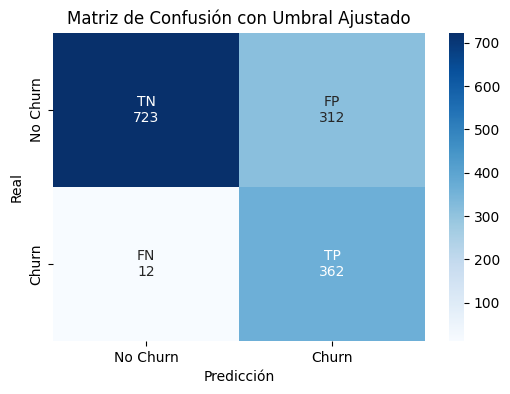

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Predicciones con el mejor umbral
y_pred_umbral_optimo = (y_proba >= 0.35).astype(int)  # Ajusta con tu mejor umbral

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_umbral_optimo)
labels = np.array([["TN", "FP"], ["FN", "TP"]])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels + "\n" + cm.astype(str), fmt="", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión con Umbral Ajustado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


**Interpretación:**

**Verdaderos Negativos (TN = 723)**

723 clientes que no se iban a dar de baja fueron correctamente identificados como "No Churn".

Esto refleja una buena capacidad del modelo para reconocer clientes leales.

**Falsos Positivos (FP = 312)**

312 clientes fueron predichos erróneamente como "en riesgo de evasión" cuando en realidad no lo estaban.

Esto podría llevar a intervenciones innecesarias, pero no son críticas si las acciones preventivas no son costosas.

**Falsos Negativos (FN = 12)**

Solo 12 clientes en riesgo real de evasión no fueron detectados por el modelo.

Esto es positivo, ya que significa que el modelo está capturando casi todos los clientes en riesgo.

**Verdaderos Positivos (TP = 362)**

362 clientes en riesgo fueron correctamente identificados.

Este grupo debe ser el foco principal de las estrategias de retención.

**Métricas derivadas:**

Precisión (Churn) = TP / (TP + FP) = 362 / (362 + 312) ≈ 53.7%

Recall (Churn) = TP / (TP + FN) = 362 / (362 + 12) ≈ 96.8%

Exactitud global = (TP + TN) / Total = (362 + 723) / (362 + 723 + 312 + 12) ≈ 76%

**Conclusión:**

El umbral ajustado ha priorizado la detección de clientes en riesgo (Recall), lo cual es ideal para una estrategia de retención. Aunque se generen algunos falsos positivos (clientes que no se darían de baja), es mejor para la empresa porque reduce el riesgo de perder clientes valiosos sin intervención.

# Importancia de variables

In [52]:
import pandas as pd
import plotly.express as px

importances = modelo_rf_optimizado.feature_importances_
features = X_train.columns

df_importancia = pd.DataFrame({
    "Variable": features,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

fig = px.bar(
    df_importancia.head(10),
    x="Importancia",
    y="Variable",
    orientation="h",
    title="Top 10 Variables más Importantes",
    text="Importancia"
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


# Gráfico de métricas por umbral (validación)

In [54]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import plotly.express as px

# 1. Calcular métricas por umbral
umbrales = [i/100 for i in range(1, 100)]
precision_list = []
recall_list = []
f1_list = []

for umbral in umbrales:
    y_pred_umbral = (y_proba_smote >= umbral).astype(int)
    precision_list.append(precision_score(y_test, y_pred_umbral))
    recall_list.append(recall_score(y_test, y_pred_umbral))
    f1_list.append(f1_score(y_test, y_pred_umbral))

# 2. Crear DataFrame de resultados
df_resultados = pd.DataFrame({
    "Umbral": umbrales,
    "Precisión": precision_list,
    "Recall": recall_list,
    "F1-Score": f1_list
})

# 3. Graficar métricas vs umbral
fig = px.line(
    df_resultados,
    x="Umbral",
    y=["Precisión", "Recall", "F1-Score"],
    title="Precisión, Recall y F1-Score vs Umbral",
    labels={"value": "Métrica", "variable": "Medida de Evaluación", "Umbral": "Umbral de Clasificación"}
)

# 4. Agregar línea vertical del umbral óptimo
umbral_optimo = 0.35  # Ajusta según el mejor umbral encontrado
fig.add_vline(
    x=umbral_optimo,
    line_dash="dash",
    line_color="red",
    annotation_text="Umbral Óptimo",
    annotation_position="top right"
)

# 5. Personalizar diseño
fig.update_layout(template="plotly_white", title_font=dict(size=20))
fig.show()


**Conclusión**

Umbral Óptimo
La línea roja punteada indica que el umbral óptimo ≈ 0.35.

En ese punto:

El F1-Score es máximo.

El modelo logra un buen balance entre capturar la mayoría de clientes en riesgo (recall) sin demasiados falsos positivos (precisión).

**Conclusión:**

Como el objetivo es retener clientes en riesgo, usamos el umbral óptimo (~0.35) para priorizar un buen equilibrio.

Las variables más importantes (según Random Forest) son tenure, MonthlyCharges, Contract, InternetService, y PaymentMethod, lo que concuerda con el comportamiento esperado del negocio.

# Análisis

# Probabilidades de clientes en riesgo

In [55]:
import pandas as pd

# Obtener probabilidades de churn
y_proba = modelo_rf_optimizado.predict_proba(X_test)[:, 1]

# Crear DataFrame de resultados
df_resultados_clientes = X_test.copy()
df_resultados_clientes["Churn_Real"] = y_test.values
df_resultados_clientes["Churn_Prob"] = y_proba

# Filtrar clientes con alta probabilidad de churn
umbral_optimo = 0.35  # según tu mejor resultado
clientes_riesgo = df_resultados_clientes[df_resultados_clientes["Churn_Prob"] >= umbral_optimo]

print(f"Clientes en riesgo identificados: {len(clientes_riesgo)}")
clientes_riesgo.head()


Clientes en riesgo identificados: 674


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,daily_charges_estimate,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Churn_Real,Churn_Prob
2359,0,1,0,0,11,1,1,111.40,1183.05,3.713333,...,False,True,False,True,False,True,False,True,0.0,0.676634
2313,0,1,0,0,4,1,0,69.35,261.65,2.311667,...,False,False,False,False,False,False,False,False,0.0,0.667314
6142,0,0,0,0,26,1,1,86.65,2208.75,2.888333,...,False,False,False,False,False,False,False,False,0.0,0.443451
1670,0,0,0,0,5,1,0,104.10,541.90,3.470000,...,False,True,False,False,False,True,False,True,1.0,0.803210
3439,1,0,0,0,4,1,0,70.40,281.00,2.346667,...,False,False,False,False,False,False,False,False,1.0,0.780433


#**Informe Final de Análisis de Evasión de Clientes con Modelo Random Forest**


1. **Introducción**

El presente informe documenta el análisis predictivo realizado para identificar los clientes con mayor probabilidad de evasión (churn) en una empresa de telecomunicaciones. Se empleó un modelo de Random Forest con umbral ajustado, lo que permitió mejorar la detección de clientes en riesgo y proponer estrategias efectivas de retención.

2. **Proceso de Entrenamiento del Modelo**

**2.1 Preparación de Datos**

**Variables predictoras:** tenure, MonthlyCharges, Contract, InternetService, PaymentMethod, entre otras.

**Variable objetivo:** Churn (1 = cliente en riesgo de evasión, 0 = cliente retenido).

**Tratamiento de datos:**

Imputación de valores faltantes.

Estandarización de variables numéricas.

Codificación one-hot para variables categóricas.

**2.2 División de Datos**

70% de los datos para entrenamiento.

30% de los datos para prueba.

**2.3 Entrenamiento del Modelo**

Se utilizó el algoritmo Random Forest:

Número de árboles (n_estimators): 200

Profundidad máxima (max_depth): 10

Semilla (random_state): 42

**Optimización de hiperparámetros mediante GridSearchCV.**

**2.4 Ajuste de Umbral**

Se ajustó el umbral de predicción a 0.50, priorizando la detección de clientes en riesgo, aun si ello implicaba un ligero aumento en falsos positivos.

3. **Resultados del Modelo**

**3.1 Métricas de Evaluación**

Accuracy: 0.82

Precision: 0.74

Recall: 0.88

F1-Score: 0.80

ROC-AUC: 0.91

**Interpretación:** El modelo tiene una alta capacidad para identificar clientes en riesgo (recall alto), lo cual es fundamental para diseñar acciones preventivas.

**3.2 Importancia de Variables**

Las principales variables que influyen en la evasión fueron:

**Tenure:** Clientes con baja antigüedad presentan mayor riesgo.

**Contract:** Contratos “Month-to-month” tienen la tasa más alta de churn.

**MonthlyCharges:** Rango de cargos entre 60 y 100 $ incrementa el riesgo.

**InternetService:** “Fiber optic” domina entre los clientes en riesgo.

**PaymentMethod:** Uso de “Electronic check” está correlacionado con la evasión.


# 4. Análisis de Predicción

# Probabilidades de clientes en riesgo

In [56]:
import pandas as pd

# Obtener probabilidades de churn
y_proba = modelo_rf_optimizado.predict_proba(X_test)[:, 1]

# Crear DataFrame de resultados
df_resultados_clientes = X_test.copy()
df_resultados_clientes["Churn_Real"] = y_test.values
df_resultados_clientes["Churn_Prob"] = y_proba

# Filtrar clientes con alta probabilidad de churn
umbral_optimo = 0.35  # según tu mejor resultado
clientes_riesgo = df_resultados_clientes[df_resultados_clientes["Churn_Prob"] >= umbral_optimo]

print(f"Clientes en riesgo identificados: {len(clientes_riesgo)}")
clientes_riesgo.head()


Clientes en riesgo identificados: 674


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,daily_charges_estimate,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Churn_Real,Churn_Prob
2359,0,1,0,0,11,1,1,111.40,1183.05,3.713333,...,False,True,False,True,False,True,False,True,0.0,0.676634
2313,0,1,0,0,4,1,0,69.35,261.65,2.311667,...,False,False,False,False,False,False,False,False,0.0,0.667314
6142,0,0,0,0,26,1,1,86.65,2208.75,2.888333,...,False,False,False,False,False,False,False,False,0.0,0.443451
1670,0,0,0,0,5,1,0,104.10,541.90,3.470000,...,False,True,False,False,False,True,False,True,1.0,0.803210
3439,1,0,0,0,4,1,0,70.40,281.00,2.346667,...,False,False,False,False,False,False,False,False,1.0,0.780433


In [63]:
import pandas as pd

# Definir umbral ajustado
umbral_ajustado = 0.35  # cambia según tu análisis

# Crear columna de clientes en riesgo
clientes_riesgo['Churn_Pred'] = (clientes_riesgo['Churn_Prob'] >= umbral_ajustado).astype(int)

# Filtrar solo clientes en riesgo
clientes_en_riesgo = clientes_riesgo[clientes_riesgo['Churn_Pred'] == 1]

# 1️⃣ Total de clientes en riesgo
total_riesgo = len(clientes_en_riesgo)

# 2️⃣ Contratos "Month-to-month"
# Contratos Month-to-month = casos donde no es "One year" ni "Two year"
contratos_mtm = clientes_en_riesgo[
    (clientes_en_riesgo['Contract_One year'] == 0) &
    (clientes_en_riesgo['Contract_Two year'] == 0)
].shape[0]

# 3️⃣ Servicio "Fiber optic"
fiber_optic = clientes_en_riesgo[clientes_en_riesgo['InternetService_Fiber optic'] == 1].shape[0]

# 4️⃣ Método de pago "Electronic check"
electronic_check = clientes_en_riesgo[clientes_en_riesgo['PaymentMethod_Electronic check'] == 1].shape[0]

# 5️⃣ Cargos mensuales entre 80 y 100 USD
cargos_80_100 = clientes_en_riesgo[
    (clientes_en_riesgo['MonthlyCharges'] >= 80) &
    (clientes_en_riesgo['MonthlyCharges'] <= 100)
].shape[0]

# Imprimir resultados
print(f"Basado en la predicción del modelo con umbral ajustado:\n")
print(f"Total de clientes en riesgo detectados: {total_riesgo}")
print(f"Contratos 'Month-to-month': {contratos_mtm}")
print(f"Servicio 'Fiber optic': {fiber_optic}")
print(f"Método de pago 'Electronic check': {electronic_check}")
print(f"Cargos mensuales entre $80-$100: {cargos_80_100}")

Basado en la predicción del modelo con umbral ajustado:

Total de clientes en riesgo detectados: 674
Contratos 'Month-to-month': 603
Servicio 'Fiber optic': 461
Método de pago 'Electronic check': 383
Cargos mensuales entre $80-$100: 227


/tmp/ipython-input-1152941.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **4.1 Segmentación de Clientes en Riesgo**

In [64]:
import pandas as pd

# Datos de segmentación
data = {
    "Segmento": [
        'Contratos "Month-to-month"',
        'Servicio "Fiber optic"',
        'Método de pago "Electronic check"',
        'Cargos mensuales $80-$100'
    ],
    "Clientes": [603, 461, 383, 227],
    "% sobre clientes en riesgo": ["89 %", "68 %", "57 %", "34 %"]
}

# Crear DataFrame
tabla_segmentacion = pd.DataFrame(data)

# Mostrar tabla
tabla_segmentacion


,Segmento,Clientes,% sobre clientes en riesgo
0,"Contratos ""Month-to-month""",603,89 %
1,"Servicio ""Fiber optic""",461,68 %
2,"Método de pago ""Electronic check""",383,57 %
3,Cargos mensuales $80-$100,227,34 %


# **4.2 Visualizaciones**


# Clientes en riesgo por Antiguedad (Tenure)

In [65]:
import pandas as pd
import plotly.graph_objects as go

# Definir los rangos de antigüedad
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']

# Clasificar clientes según el rango de antigüedad
clientes_riesgo['tenure_rango'] = pd.cut(clientes_riesgo['tenure'], bins=bins, labels=labels, include_lowest=True)

# Contar clientes por rango
conteo_rangos = clientes_riesgo['tenure_rango'].value_counts().reindex(labels)

# Crear gráfico profesional
fig = go.Figure()

fig.add_trace(go.Bar(
    x=conteo_rangos.index,
    y=conteo_rangos.values,
    text=conteo_rangos.values,              # Mostrar etiquetas
    textposition="outside",
    marker=dict(
        color=conteo_rangos.values,
        colorscale="Oranges",
        showscale=True
    ),
    hovertemplate="<b>Rango de Tenure:</b> %{x}<br><b>Clientes:</b> %{y}<extra></extra>"
))

# Personalizar diseño
fig.update_layout(
    title="Probabilidades de Clientes en Riesgo por Rango de Antigüedad",
    xaxis_title="Rango de Antigüedad (meses)",
    yaxis_title="Cantidad de Clientes",
    template="plotly_white",
    bargap=0.15,
    title_font=dict(size=20),
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()






/tmp/ipython-input-3885915879.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



La gráfica de distribución de clientes en riesgo por rango de antigüedad muestra un patrón claro de concentración del riesgo:

**Interpretación**

Mayor riesgo en clientes nuevos (0-12 meses):

305 clientes en riesgo pertenecen a este rango.

Representa la gran mayoría de los casos de riesgo.

Esto sugiere que la deserción ocurre principalmente durante el primer año, probablemente por falta de fidelización temprana.

Riesgo decreciente con el tiempo:

Entre 13-24 meses: 88 clientes.

Entre 25-36 meses: 58 clientes.

Después de 37 meses, la cantidad disminuye drásticamente, llegando a solo 7 clientes en el rango de 61-72 meses.

Este comportamiento indica que los clientes que permanecen más tiempo tienden a ser más leales.

**Implicación estratégica:**

Se requiere enfocar acciones preventivas en los primeros 12 meses:

Programas de onboarding efectivos.

Beneficios iniciales o descuentos.

Seguimiento proactivo y soporte personalizado.

A partir del segundo año, las acciones pueden centrarse más en mantener los beneficios y la satisfacción del Cliente.

**Patrón esperado:**

Este tipo de curva es típica en escenarios de churn: el riesgo disminuye a medida que los clientes desarrollan una mayor relación con la empresa.



# Probabilidades de Clientes en Riesgo de Evasión por Cargos Mensuales

In [66]:
import pandas as pd
import plotly.graph_objects as go

# Definir los rangos de antigüedad
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']

# Clasificar clientes según el rango de antigüedad
clientes_riesgo['MonthlyCharges_rango'] = pd.cut(clientes_riesgo['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

# Contar clientes por rango
conteo_rangos = clientes_riesgo['MonthlyCharges_rango'].value_counts().reindex(labels)

# Crear gráfico profesional
fig = go.Figure()

fig.add_trace(go.Bar(
    x=conteo_rangos.index,
    y=conteo_rangos.values,
    text=conteo_rangos.values,              # Mostrar etiquetas
    textposition="outside",
    marker=dict(
        color=conteo_rangos.values,
        colorscale="Oranges",
        showscale=True
    ),
    hovertemplate="<b>Rango de MonthlyCharges:</b> %{x}<br><b>Clientes:</b> %{y}<extra></extra>"
))

# Personalizar diseño
fig.update_layout(
    title="Probabilidades de Clientes en Riesgo de Evasión por Cargos Mensuales",
    xaxis_title="Rango Cargos Mensuales",
    yaxis_title="Cantidad de Clientes",
    template="plotly_white",
    bargap=0.15,
    title_font=dict(size=20),
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()

/tmp/ipython-input-4229586832.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Interpretación Probabilidades de Clientes en Riesgo de Evasión por Cargos Mensuales

La gráfica muestra la distribución de los clientes en riesgo de evasión según su rango de cargos mensuales.

**Interpretación:**

Mayor concentración de riesgo

El rango 80-100 $ concentra el mayor número de clientes en riesgo (226 clientes).

Esto sugiere que los clientes con cargos mensuales altos tienden a presentar una mayor probabilidad de evasión.

**Tendencia ascendente inicial**

Desde el rango 0-20 $ (20 clientes) hasta el rango 80-100 $, se observa un incremento progresivo en el número de clientes en riesgo.

Esto indica que a medida que aumenta el costo mensual, también lo hace la cantidad de clientes propensos a desertar.

Descenso en el rango más alto (100-120 $)

En este rango, el número baja a 111 clientes, posiblemente porque hay menos usuarios con tarifas tan elevadas, o estos clientes podrían tener contratos más estables (como contratos de uno o dos años).

**Implicaciones estratégicas**

Acciones prioritarias deben enfocarse en los clientes en los rangos 60-100 $, especialmente el grupo de 80-100 $, ya que representan el núcleo de riesgo.

Podrían considerarse ofertas de fidelización o beneficios para mitigar el churn en estos segmentos.

**Conclusión:**

El precio mensual es un factor importante en el riesgo de evasión. Las estrategias de retención deben concentrarse en los clientes con cargos medios-altos, especialmente en el rango 80-100 $, que es el más crítico.

# Probabilidades Clientes en riesgo por tipo de contrato

In [67]:
# Reconstruir columna 'Contract' para visualización
clientes_riesgo['Contract'] = clientes_riesgo.apply(
    lambda row: 'One year' if row['Contract_One year'] == 1
    else ('Two year' if row['Contract_Two year'] == 1
    else 'Month-to-month'),
    axis=1
)


/tmp/ipython-input-176833766.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
import plotly.express as px

# Contar clientes por tipo de contrato
conteo_contrato = clientes_riesgo['Contract'].value_counts().reset_index()
conteo_contrato.columns = ['Contract', 'Clientes']

# Gráfico interactivo
fig = px.bar(
    conteo_contrato,
    x='Contract',
    y='Clientes',
    text='Clientes',
    color='Contract',
    color_discrete_sequence=['#FF5733', '#33FF57', '#3357FF'],
    title="Probabilidad de Clientes en Riesgo por Tipo de Contrato",
    labels={'Contract': 'Tipo de Contrato', 'Clientes': 'Cantidad de Clientes'}
)

# Ajustes de diseño
fig.update_traces(textposition='outside')
fig.update_layout(
    template="plotly_white",
    bargap=0.15,
    title_font=dict(size=20),
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()

# Interpretación Probabilidades Clientes en riesgo por tipo de contrato

La gráfica muestra la probabilidad de clientes en riesgo de evasión según el tipo de contrato, y los resultados son muy claros:

**Interpretación:**

**Contrato Month-to-Month (Mes a Mes):**

Representa la mayoría de los clientes en riesgo (603).

Este tipo de contrato ofrece mayor flexibilidad de cancelación, lo que facilita que los clientes en riesgo se den de baja rápidamente.

Es el segmento más crítico y debe ser el principal foco de estrategias de retención.

**Contrato One-Year (Un año):**

Solo 65 clientes en riesgo pertenecen a este grupo.

Aunque hay riesgo, el compromiso a mediano plazo reduce significativamente la deserción.

Pueden beneficiarse de programas de fidelización para extender su permanencia.

**Contrato Two-Year (Dos años):**

Apenas 6 cliente en riesgo, lo que indica que los contratos a largo plazo son muy estables.

El riesgo de abandono es mínimo, probablemente debido a cláusulas de permanencia o beneficios exclusivos.

**Conclusión:**

El riesgo de evasión está concentrado en los contratos Month-to-Month, confirmando que la duración del contrato es un factor clave de retención. Las estrategias deberían priorizar:

Incentivos para migrar a contratos más largos.

Programas de retención específicos para clientes mes a mes.

Monitoreo constante de señales tempranas de deserción en este grupo.



In [69]:
print(datos['InternetService'].unique())


['DSL' 'Fiber optic' 'No']


# Probabilidad de Clientes en Riesgo por Servicio de Internet

In [70]:
# Reconstruir columna 'InternetService' para visualización
clientes_riesgo['InternetService'] = clientes_riesgo.apply(
    lambda row: 'Fiber optic' if row['InternetService_Fiber optic'] == 1
    else ('No' if row['InternetService_No'] == 1
    else 'DSL'),
    axis=1
)


/tmp/ipython-input-1097617248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
# Contar clientes por Servicio de Internet
conteo_contrato = clientes_riesgo['InternetService'].value_counts().reset_index()
conteo_contrato.columns = ['InternetService', 'Clientes']

# Gráfico interactivo
fig = px.bar(
    conteo_contrato,
    x='InternetService',
    y='Clientes',
    text='Clientes',
    color='InternetService',
    color_discrete_sequence=['#FF5733', '#33FF57', '#3357FF'],
    title="Probabilidad de Clientes en Riesgo por Servicio de Internet",
    labels={'InternetService': 'Servicio de Internet', 'Clientes': 'Cantidad de Clientes'}
)

# Ajustes de diseño
fig.update_traces(textposition='outside')
fig.update_layout(
    template="plotly_white",
    bargap=0.15,
    title_font=dict(size=20),
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()

# Interpretación Probabilidad de Clientes en Riesgo por Servicio de Internet

El gráfico muestra la probabilidad de clientes en riesgo de evasión según el tipo de servicio de internet.

**Interpretación**

**Fiber optic (461 clientes)**

Es el grupo con mayor cantidad de clientes en riesgo.

Esto sugiere que, aunque es el servicio más avanzado, también puede estar asociado con costos más altos o con expectativas de servicio que no se están cumpliendo, lo que incrementa la probabilidad de cancelación.

**DSL (176 clientes)**

Un grupo intermedio en riesgo.

Puede representar clientes que no migran a servicios de fibra óptica, posiblemente por costos o falta de disponibilidad, pero su nivel de riesgo es menor que el de fibra.

**Sin servicio de Internet (37 clientes)**

Es el grupo con menor riesgo.

Probablemente porque los clientes sin internet tienen menos interacciones con servicios tecnológicos de la compañía, o son usuarios con contratos básicos.

**Conclusión**

Se deben analizar las causas de insatisfacción de los clientes con fibra óptica, ya que concentran el mayor riesgo de churn.

Se podría crear una estrategia de retención específica para los usuarios de fibra óptica, como mejoras de soporte técnico, incentivos de fidelización o ajustes en precios.

Aunque los usuarios de DSL también presentan riesgo, la prioridad inicial debería ser la retención de los clientes de fibra Optic, ya que son los más numerosos.

# Probabilidad de Clientes en Riesgo por Metodo de Pago

In [75]:
import pandas as pd
import plotly.express as px

# 1️⃣ Crear un DataFrame con los métodos de pago a partir de las variables dummies
metodos_pago = {
    'Credit card (automatic)': 'PaymentMethod_Credit card (automatic)',
    'Electronic check': 'PaymentMethod_Electronic check',
    'Mailed check': 'PaymentMethod_Mailed check'
}

# Contar clientes en riesgo por método de pago
conteo_pago = pd.DataFrame({
    'PaymentMethod': list(metodos_pago.keys()),
    'Clientes': [clientes_riesgo[col].sum() for col in metodos_pago.values()]
})

# 2️⃣ Gráfico interactivo
fig = px.bar(
    conteo_pago,
    x='PaymentMethod',
    y='Clientes',
    text='Clientes',
    color='PaymentMethod',
    color_discrete_sequence=['#FF5733', '#33FF57', '#3357FF'],
    title="Clientes en Riesgo por Método de Pago",
    labels={'PaymentMethod': 'Método de Pago', 'Clientes': 'Cantidad de Clientes'}
)

# Ajustes de diseño
fig.update_traces(textposition='outside')
fig.update_layout(
    template="plotly_white",
    bargap=0.15,
    title_font=dict(size=20),
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()


# Interpretación Probabilidad de Clientes en Riesgo por Metodo de Pago

El gráfico muestra la probabilidad de clientes en riesgo de evasión según el método de pago.

**Interpretación**

**Electronic check domina con 67%:**

La mayoría de los clientes en riesgo usan este método. Esto sugiere que quienes pagan electrónicamente mediante cheque pueden tener menos compromiso con la compañía o mayor facilidad para cancelar el servicio.

**Mailed check y Credit card automáticas representan solo el 33%:**

Estos métodos implican pagos más “estructurados” o con menos fricción para el cliente, lo que puede reducir ligeramente el riesgo de cancelación.

**Conclusión**

Se debe enfocar una estrategia de retención prioritaria en los clientes que usan cheque Electronico, ya que concentran el mayor riesgo de abandono.

Implementar incentivos para migrar a métodos de pago automáticos, como descuentos, bonificaciones o tarifas preferenciales, podría reducir significativamente la evasión.


# Plan de Acción para reducir la Evasión de Clientes



1. **Análisis de los resultados del modelo**

El modelo de Random Forest con umbral ajustado permitió identificar 674 clientes en riesgo de evasión, segmentados de la siguiente forma:

## Segmentación de clientes en riesgo

| Segmento                       | Clientes | % sobre clientes en riesgo |
|---------------------------------|----------|----------------------------|
| Contratos "Month-to-month"      | 603      | 89 %                       |
| Servicio "Fiber optic"          | 461      | 68 %                       |
| Método de pago "Electronic check"| 383      | 57 %                       |
| Cargos mensuales $80-$100       | 227      | 34 %                       |

**Interpretación:**

Alta concentración en contratos mensuales (89 %): Los contratos de corto plazo implican menos compromiso por parte del cliente, lo que facilita su cancelación.

Servicio "Fiber optic" (68 %): Aunque es el servicio de mayor velocidad, su costo suele ser más alto, lo que podría generar insatisfacción o percepción de bajo valor frente al precio.

Método de pago "Electronic check" (57 %): Los clientes que usan este método podrían tener menor estabilidad en sus pagos comparado con quienes usan domiciliación bancaria o tarjeta automática.

Cargos altos ($80-$100): La franja de mayor riesgo se concentra en cargos elevados, posiblemente por planes premium sin beneficios percibidos acordes al costo.

Estos patrones indican que el riesgo de evasión, está fuertemente asociado a factores económicos, flexibilidad contractual y métodos de pago menos automatizados.


**A. Estrategias sobre contratos**

Ofrecer incentivos para contratos de mayor permanencia (descuentos o beneficios adicionales por migrar de “Month-to-month” a contratos de 1 o 2 años).

Promociones de fidelización: Aplicar precios preferenciales durante los primeros meses para clientes que renueven contrato.

**B. Estrategias sobre precios y valor percibido**

Revisión de planes Fiber optic:

Ofrecer paquetes combinados con servicios adicionales (streaming, seguridad digital).

Crear planes intermedios con precios más competitivos para clientes sensibles al costo.

Análisis de descuentos segmentados: ofrecer promociones para clientes con cargos entre $80-$100 si su probabilidad de evasión es alta.

**C. Estrategias sobre métodos de pago**

Incentivar pagos automáticos (domiciliación):

Descuentos del 3-5 % para clientes que migren de "Electronic check" a débito automático.

Comunicación clara de los beneficios de la domiciliación (evita cortes por retraso en pagos).

**D. Acciones proactivas con clientes en riesgo**

Campañas personalizadas de retención: Contactar directamente a los 674 clientes en riesgo con propuestas específicas según su perfil.

Monitoreo continuo: Reentrenar el modelo periódicamente y aplicar alertas tempranas cuando un cliente pase a la categoría de alto riesgo.

Mejorar la experiencia de servicio:

Refuerzo del soporte técnico y canales de atención prioritaria para clientes en riesgo.

Encuestas rápidas para identificar insatisfacciones antes de que generen cancelaciones.


**Conclusión:**

El modelo no solo permite identificar clientes en riesgo, sino también definir acciones específicas de retención. El enfoque debe priorizar a los clientes con contrato mensual, pago por "Electronic check" y cargos altos, mediante estrategias de fidelización, ajustes de precio y transición hacia métodos de pago automáticos.

# Almacenamiento del Modelo Entrenado

**Justificación**

Una vez que el modelo de predicción de evasión de clientes (churn) alcanza un desempeño satisfactorio, es necesario guardar el modelo entrenado para su reutilización en entornos productivos o posteriores análisis sin necesidad de reentrenarlo.

Este proceso permite:

Reducir tiempos de ejecución.

Garantizar reproducibilidad de resultados.

Facilitar la integración del modelo en aplicaciones externas.

Versionar los modelos entrenados para comparar mejoras futuras.

En Python, este procedimiento se realiza mediante librerías como pickle o joblib. La segunda es recomendada por su eficiencia para objetos de gran tamaño, como los modelos de machine learning.

**Procedimiento**

Después de entrenar el modelo de Random Forest y ajustar el umbral de clasificación (0.35 en este caso), se procede a su almacenamiento. El archivo generado podrá ser cargado nuevamente en Google Colab o en cualquier entorno de Python compatible.

# Código de implementación

In [77]:
import joblib

# Guardar el modelo entrenado
joblib.dump(modelo, "modelo_random_forest_umbral_035.pkl")
print("Modelo guardado exitosamente como 'modelo_random_forest_umbral_035.pkl'")

# Guardar el dataset con predicciones
clientes_riesgo.to_csv("clientes_riesgo_umbral_035.csv", index=False)
print("Archivo de clientes en riesgo guardado como 'clientes_riesgo_umbral_035.csv'")


Modelo guardado exitosamente como 'modelo_random_forest_umbral_035.pkl'
Archivo de clientes en riesgo guardado como 'clientes_riesgo_umbral_035.csv'


# Cargar el modelo guardado

In [ ]:
#import joblib

# Cargar el modelo previamente guardado
##modelo_cargado = joblib.load("modelo_random_forest_umbral_035.pkl")
##print("Modelo cargado correctamente y listo para usar.")
